# Looking at Homelessness in Oregon 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import numpy as np 
import plotly.express as px

### Downloading Homeless Count Data 

In [2]:
#read the dataframe 
bp = pd.read_excel('2007-2021-PIT-Counts-by-CoC.xlsx')

In [3]:
# get the names of sheets in the excel file
Coc_numbs = bp['CoC Number'].tolist()

In [4]:
#read in each file as a new DF
xls = pd.ExcelFile('2007-2021-PIT-Counts-by-CoC.xlsx')
years = [str(i) for i in range(2007, 2022)]
print(years)

['2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021']


In [5]:
# Makes a copy of each sheet in the excel workbook 
# FYI this takes a while to load
yr2007 = pd.read_excel(xls, years[0])
yr2008 = pd.read_excel(xls, years[1])
yr2009 = pd.read_excel(xls, years[2])
yr2010 = pd.read_excel(xls, years[3])
yr2011 = pd.read_excel(xls, years[4])
yr2012 = pd.read_excel(xls, years[5])
yr2013 = pd.read_excel(xls, years[6])
yr2014 = pd.read_excel(xls, years[7])
yr2015 = pd.read_excel(xls, years[8])
yr2016 = pd.read_excel(xls, years[9])
yr2017 = pd.read_excel(xls, years[10])
yr2018 = pd.read_excel(xls, years[11])
yr2019 = pd.read_excel(xls, years[12])
yr2020 = pd.read_excel(xls, years[13])
yr2021 = pd.read_excel(xls, years[14])

In [6]:
#adding all of the sheets to a list, checking null values
sheets = [yr2007, yr2008, yr2009, yr2010,yr2011, yr2012, yr2013, yr2014, yr2015, yr2016, yr2017, yr2018, yr2019,
         yr2020, yr2021]
sheets[1].isnull().sum()

CoC Number                                                2
CoC Name                                                  2
Overall Homeless, 2008                                    2
Sheltered ES Homeless, 2008                               2
Sheltered TH Homeless, 2008                               2
Sheltered Total Homeless, 2008                            2
Unsheltered Homeless, 2008                                2
Overall Homeless Individuals, 2008                        2
Sheltered ES Homeless Individuals, 2008                   2
Sheltered TH Homeless Individuals, 2008                   2
Sheltered Total Homeless Individuals, 2008                2
Unsheltered Homeless Individuals, 2008                    2
Overall Homeless People in Families, 2008                 2
Sheltered ES Homeless People in Families, 2008            2
Sheltered TH Homeless People in Families, 2008            2
Sheltered Total Homeless People in Families, 2008         2
Unsheltered Homeless People in Families,

In [7]:
# Adding the year column
for i in range(len(sheets)):
    sheets[i].insert(0, "Year", years[i])

## Data Cleaning 

In [8]:
# Taking each excel sheet and concatinating them ontop of each other to create a single dataset with all years and variables
oregonstacked = yr2007[(yr2007['CoC Number'] > 'OR-000') & (yr2007['CoC Number'] < 'PA')]
for i in range(1, len(sheets)):
    oregonstacked = pd.concat([oregonstacked, sheets[i][(sheets[i]['CoC Number'] > 'OR-000') & (sheets[i]['CoC Number'] < 'PA')]])

# removing some variables that are not relevent to our questions
# (ES and TH are types of homlessness but we want to look at totals)
oregoncut = oregonstacked
for column in oregoncut.columns:
    if "ES" in column or 'TH' in column:
        oregonstacked = oregonstacked.drop(column, axis = 1)

# renamed bc the next step changes the layout of the dataset 
OR = oregonstacked

# Creates the new index for the data 
OR.set_index(["CoC Name", "CoC Number","Year"], inplace= True)
# Changes all other collumns to rows besides the index
OR = OR.stack().reset_index()
# changes the new column names to be useful desctiptors 
OR.columns= ["CoC Name", "CoC Number", "Year", "Description","Homeless Count"]
# Gets rid of the last 6 characters in the Desription column 
# The last 6 characters say the year but we added a year column earlier that shows the same info
OR['Description'] = OR["Description"].map(lambda x: str(x)[:-6])

OR.tail()

CoC Name  ... Homeless Count
16742  Clackamas County CoC  ...              1
16743  Clackamas County CoC  ...              0
16744  Clackamas County CoC  ...              9
16745  Clackamas County CoC  ...              4
16746  Clackamas County CoC  ...              9

[5 rows x 5 columns]

In [29]:
OR.head()

CoC Name  ... Homeless Count
0  Eugene, Springfield/Lane County CoC  ...         2332.0
1  Eugene, Springfield/Lane County CoC  ...         1560.0
2  Eugene, Springfield/Lane County CoC  ...          772.0
3  Eugene, Springfield/Lane County CoC  ...         1295.0
4  Eugene, Springfield/Lane County CoC  ...          816.0

[5 rows x 5 columns]

In [9]:
# A few rows in 2021 are giving errors  
# Here we find those rows and take them out of the dataframe 
OR.loc[OR['Description'] == "CoC Ca"]
OR = OR.drop([15443,15606,15769,15932,16095,16258,16421,16584])
OR.loc[OR['Description'] == "Sheltered and full unsheltered"]
OR = OR.drop([15444,15770,16422,16585])
OR.loc[OR['Homeless Count'] == "Sheltered-Only Count"]
OR = OR.drop([15607,16096,16259])
OR.loc[OR['Homeless Count'] == "Sheltered and partial unsheltered"]
OR = OR.drop([15933])

In [10]:
# When we restacked the Dataframe all the data types were changed to objects
# Coverting dtypes to make better graphics 
OR["Homeless Count"] = OR["Homeless Count"].astype("str").astype("float")
OR["Year"] = OR["Year"].astype("str").astype("int")
OR.dtypes

CoC Name           object
CoC Number         object
Year                int64
Description        object
Homeless Count    float64
dtype: object

## Initial Data Exporation 

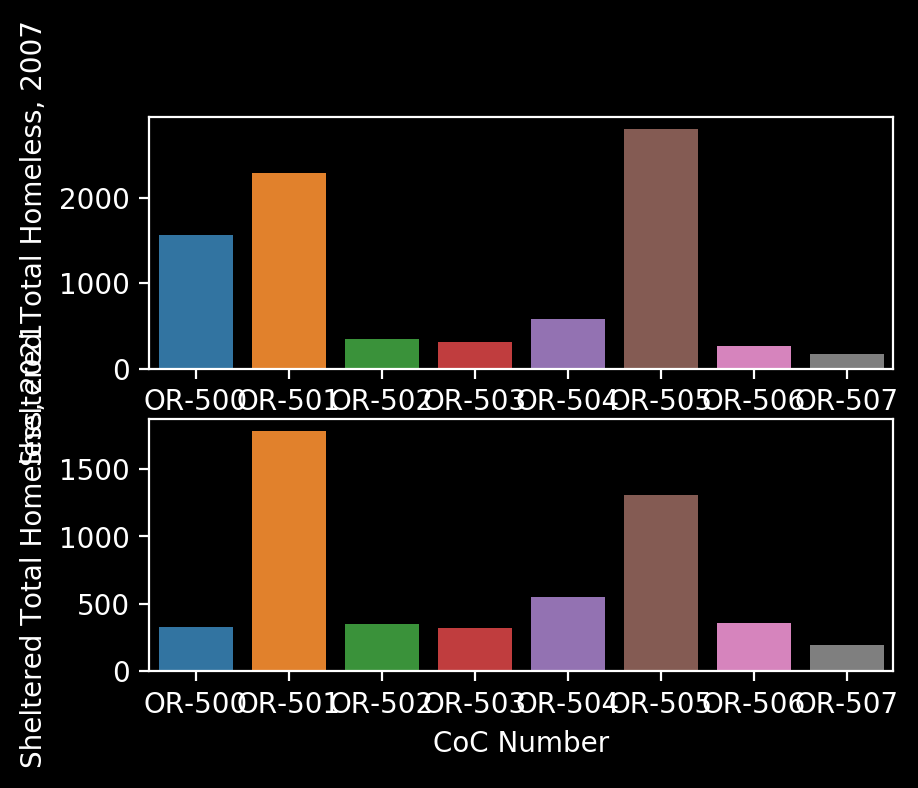

In [11]:
fig, axis = plt.subplots(2, 1)
sns.barplot(data=oregoncut, y='Sheltered Total Homeless, 2007', x = "CoC Number", ax=axis[0])
sns.barplot(data=oregoncut, y='Sheltered Total Homeless, 2021', x = "CoC Number", ax=axis[1])
plt.show()

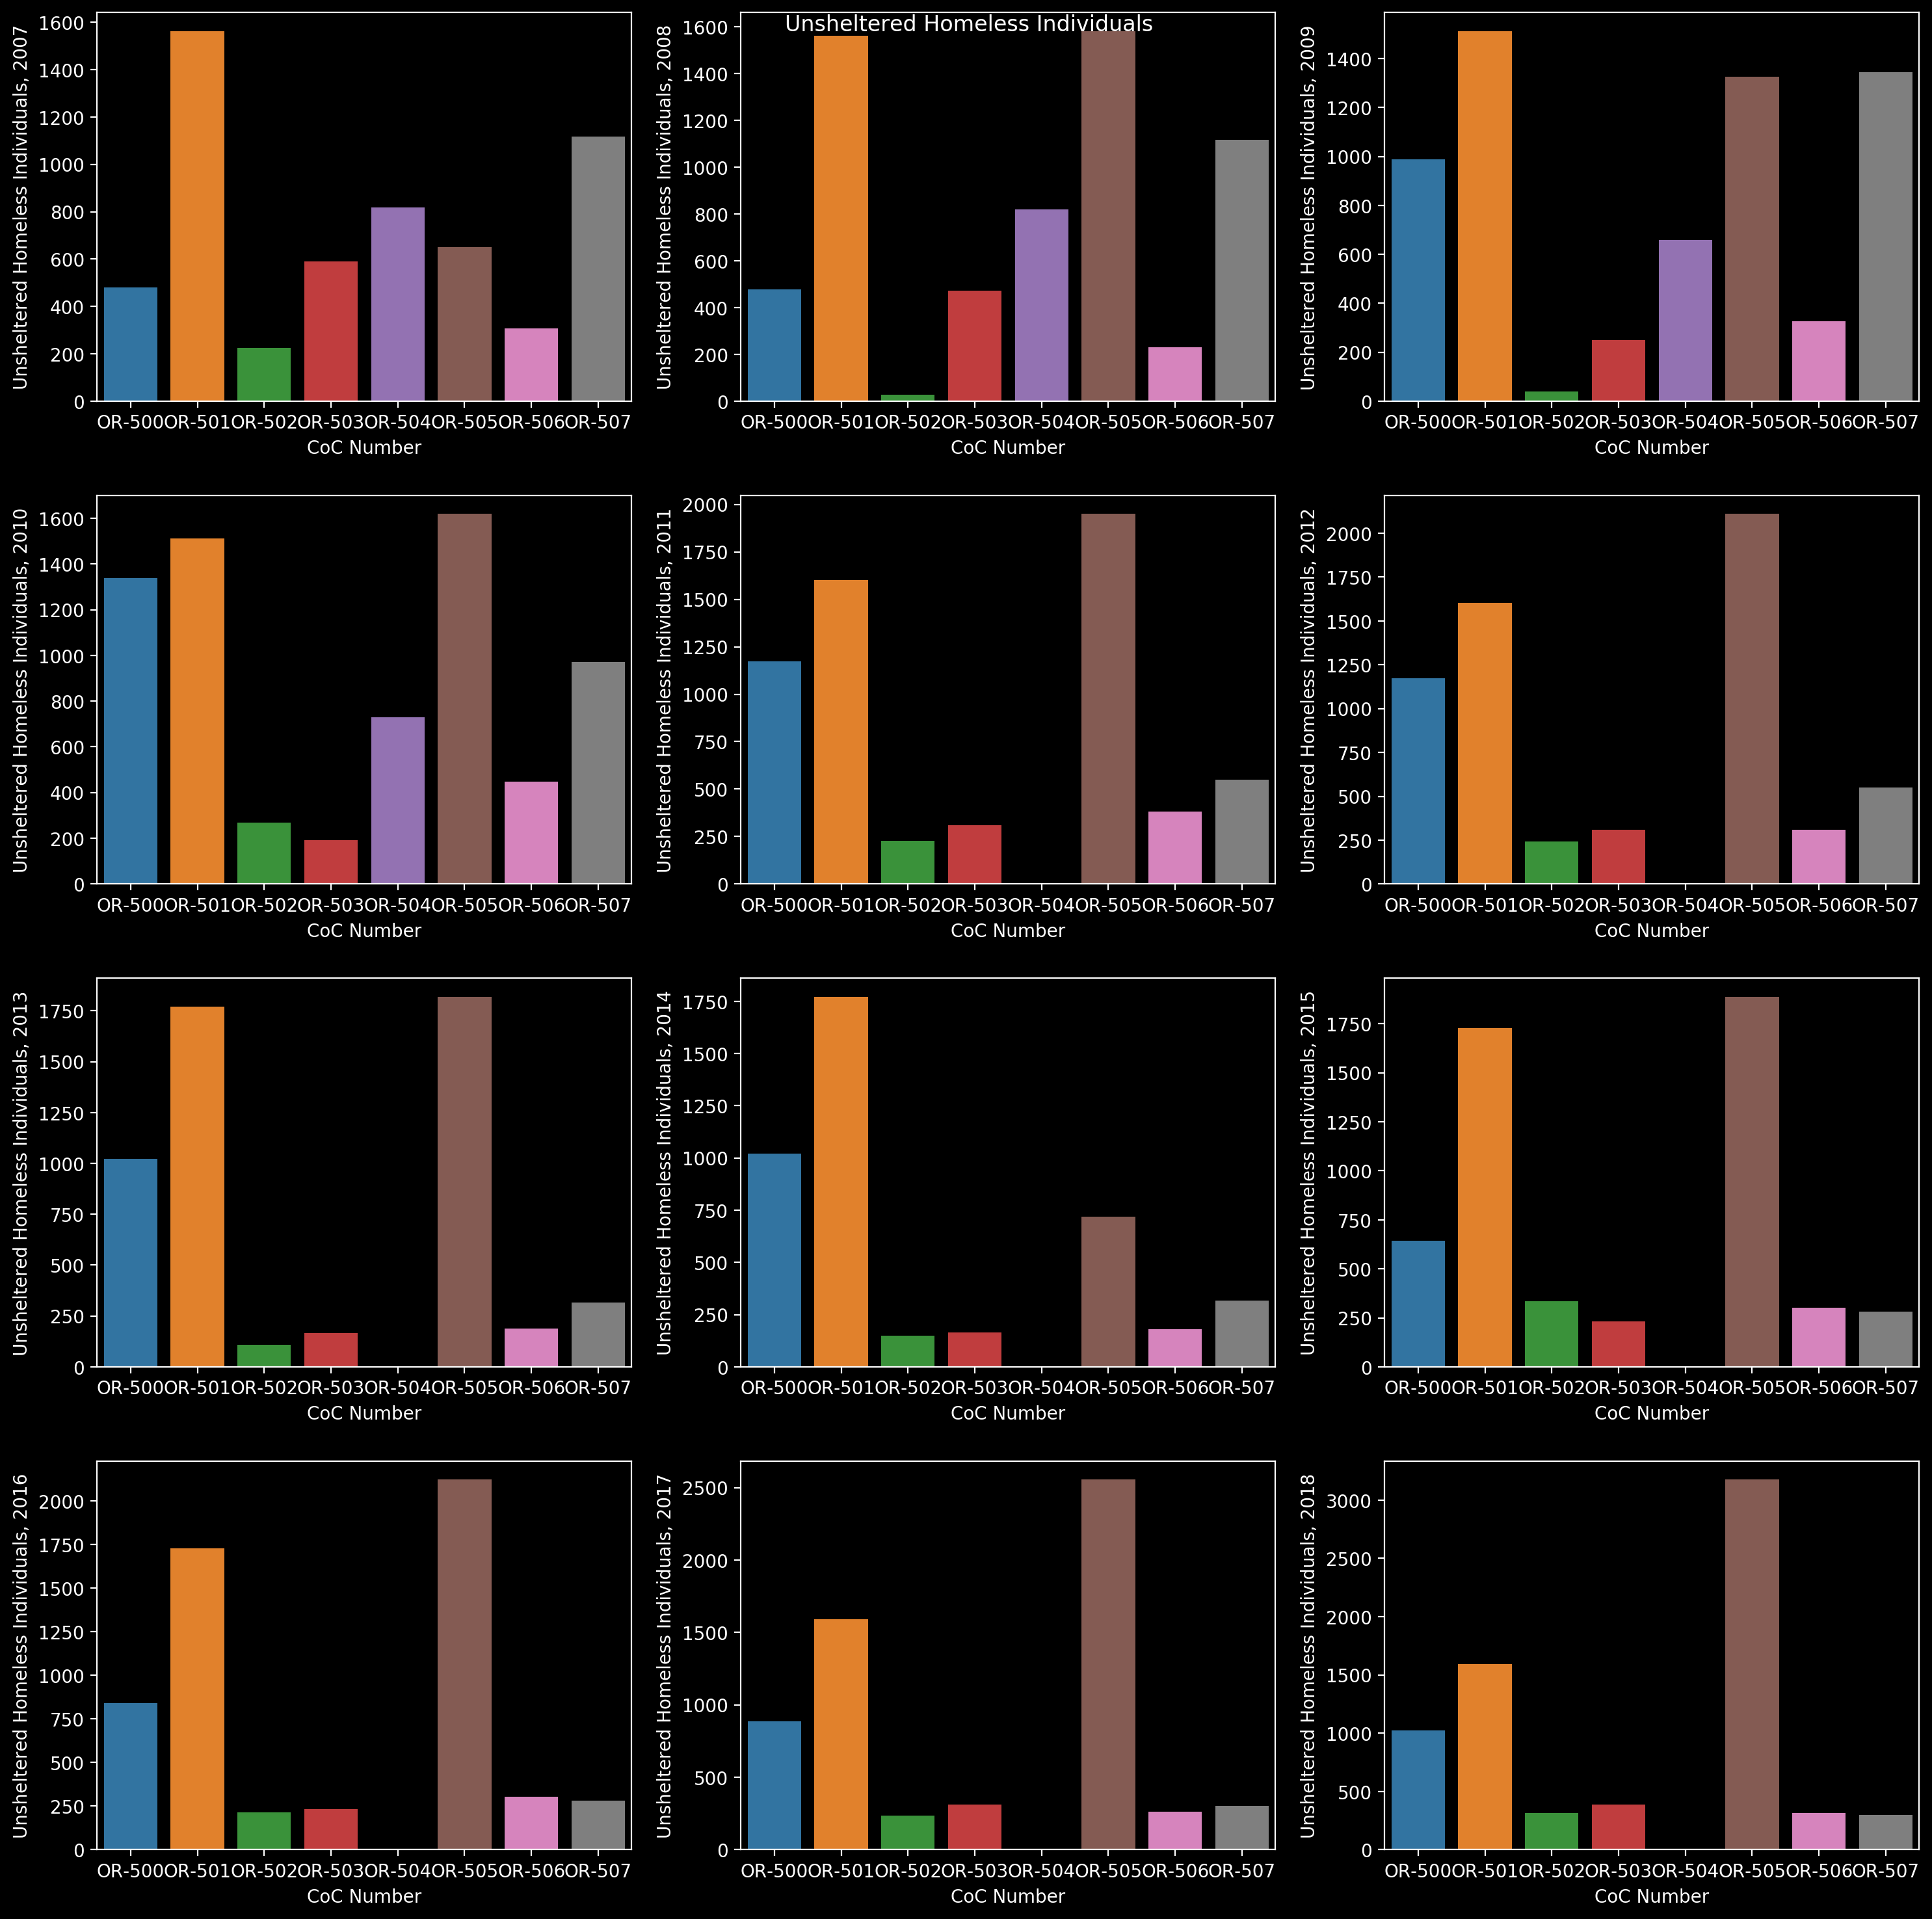

In [12]:
fig, axis = plt.subplots(4, 3, figsize=(15,15))
year = 0
for m in range(4):
    for j in range(3):
        sns.barplot(data=oregoncut, y='Unsheltered Homeless Individuals, ' + str(years[year]), x = "CoC Number", 
                    ax=axis[m, j])
        year += 1
fig.suptitle("Unsheltered Homeless Individuals")
plt.tight_layout()

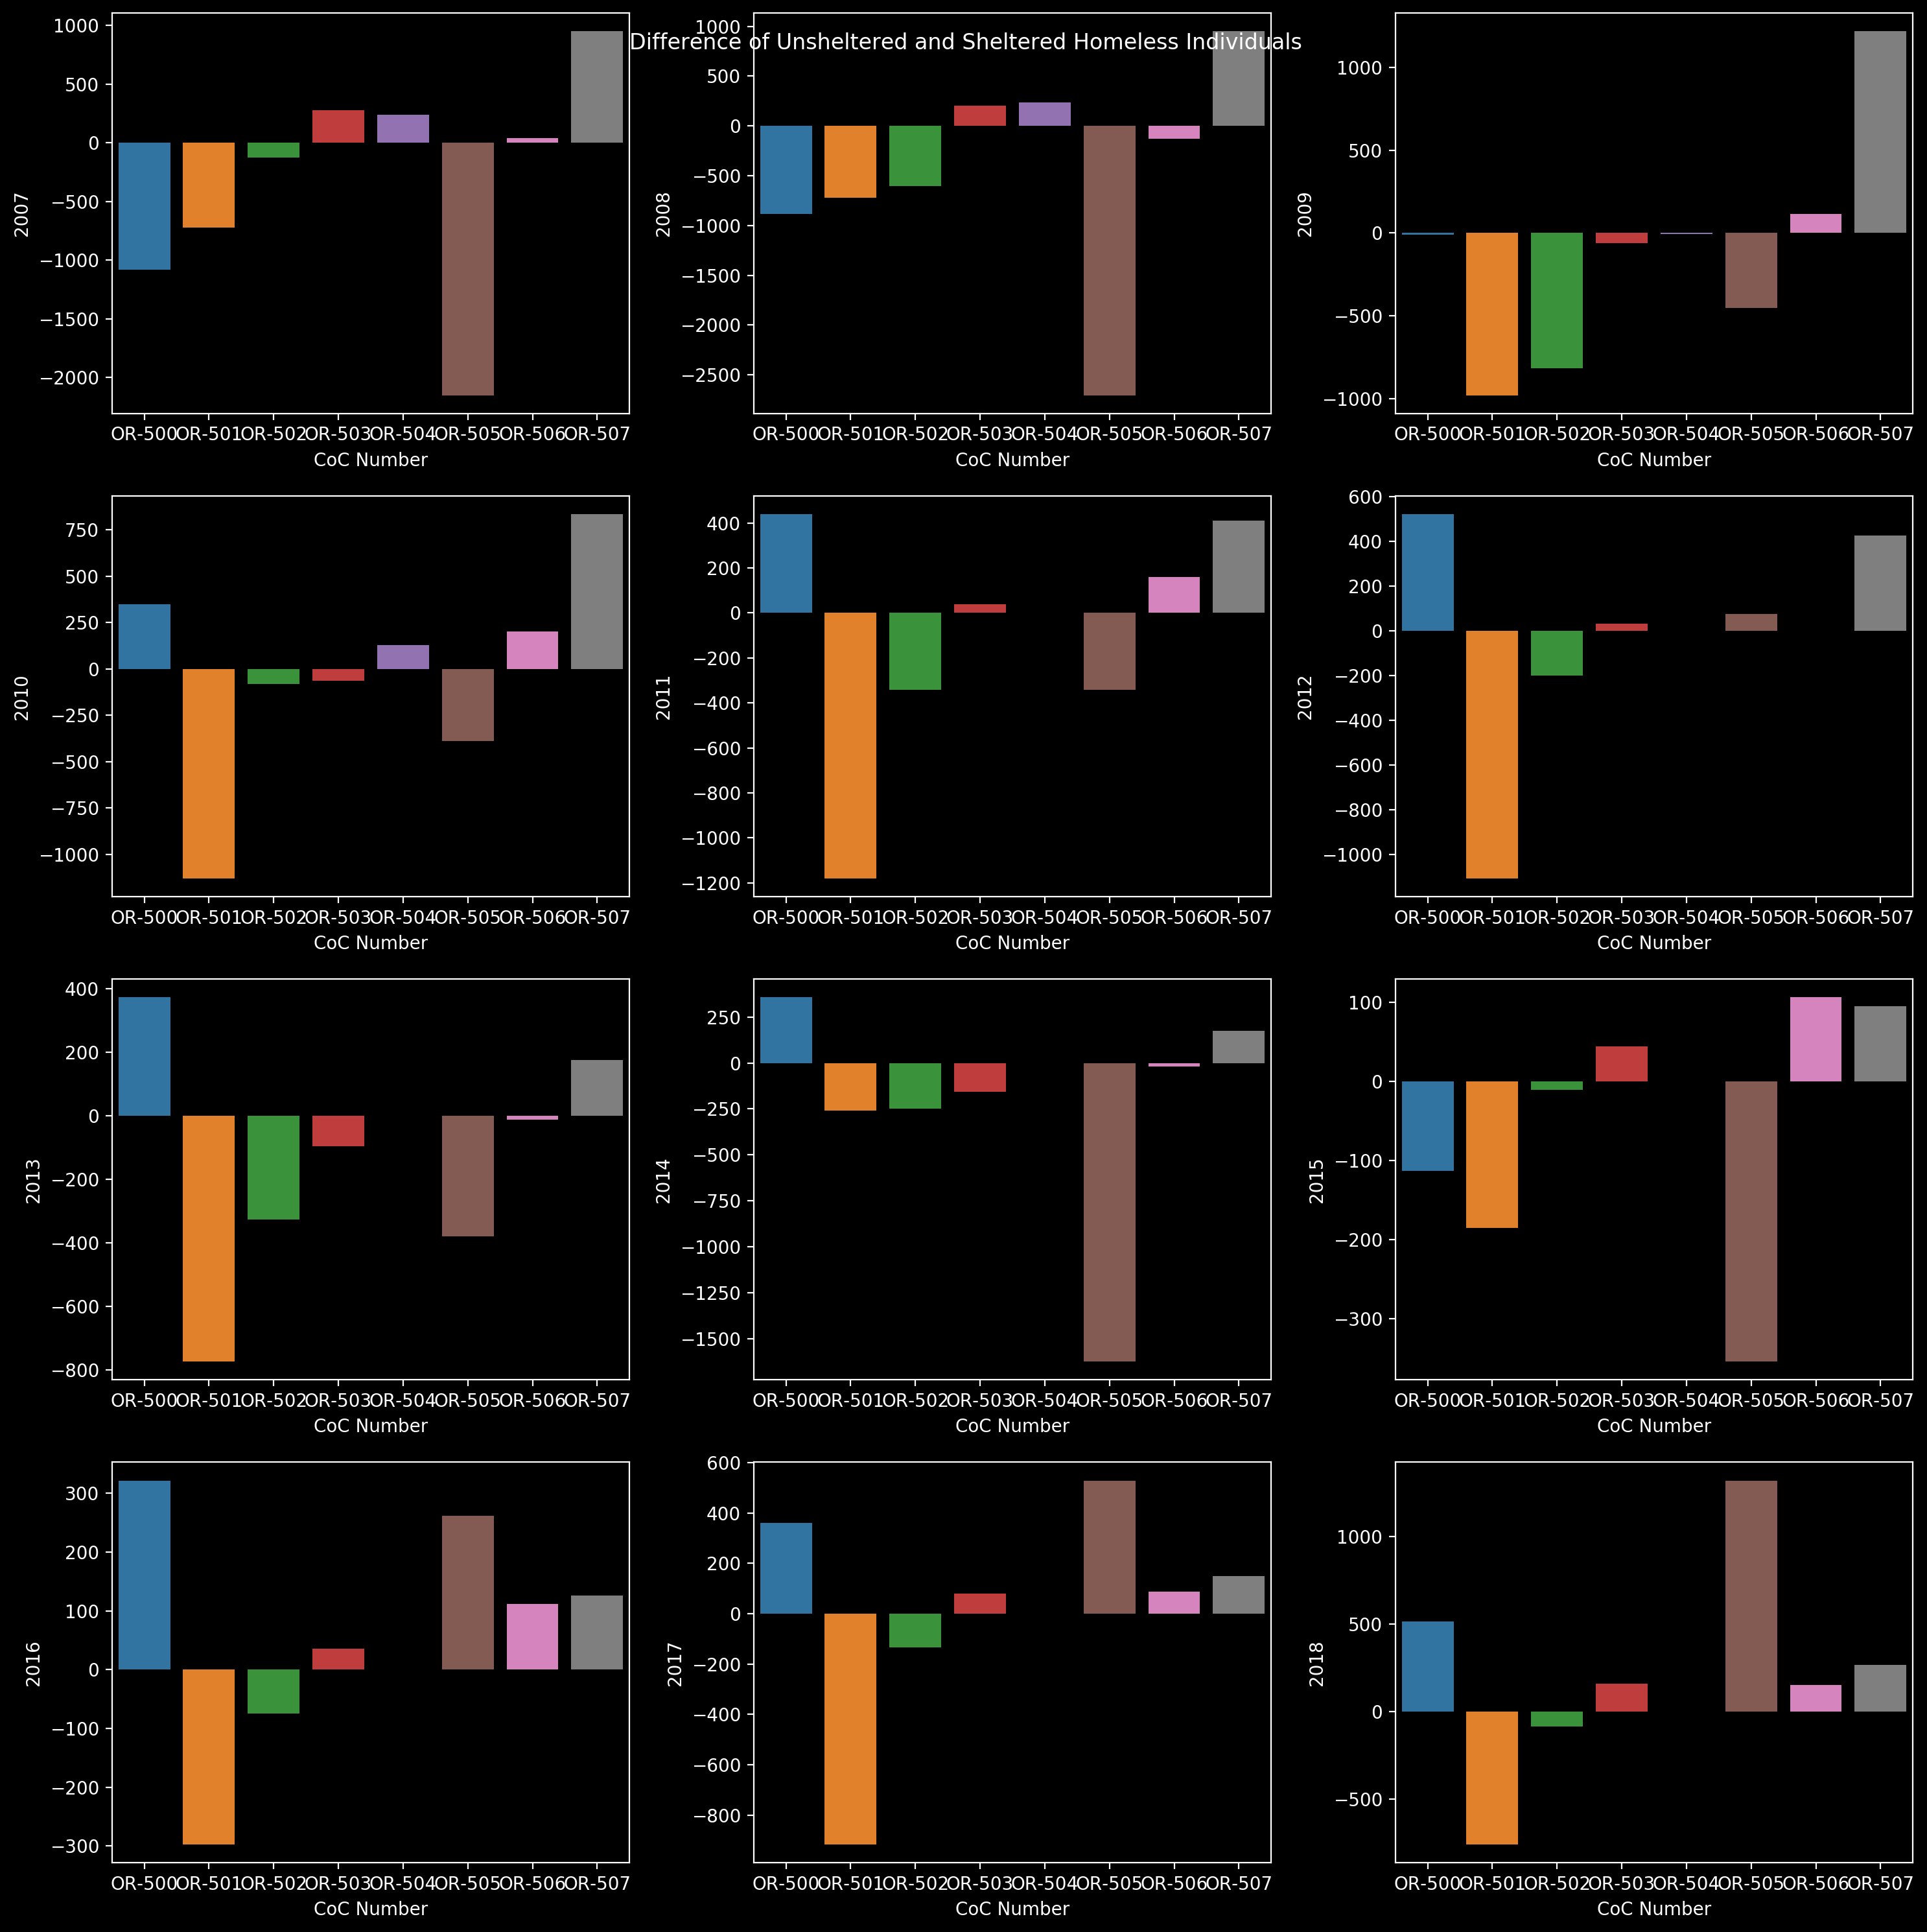

In [13]:
# next can do unsheltered vs sheltered difference to see how much each group is doing to keep the houseless population safe
fig, axis = plt.subplots(4, 3, figsize=(15,15))
year = 0
for m in range(4):
    for j in range(3):
        sns.barplot(data=oregoncut, y=oregoncut['Unsheltered Homeless Individuals, ' + str(years[year])]
                    - oregoncut['Sheltered Total Homeless, ' + str(years[year])], x = "CoC Number", 
                    ax=axis[m, j])
        axis[m, j].set_ylabel(years[year])
        year += 1
fig.suptitle("Difference of Unsheltered and Sheltered Homeless Individuals")
plt.tight_layout()

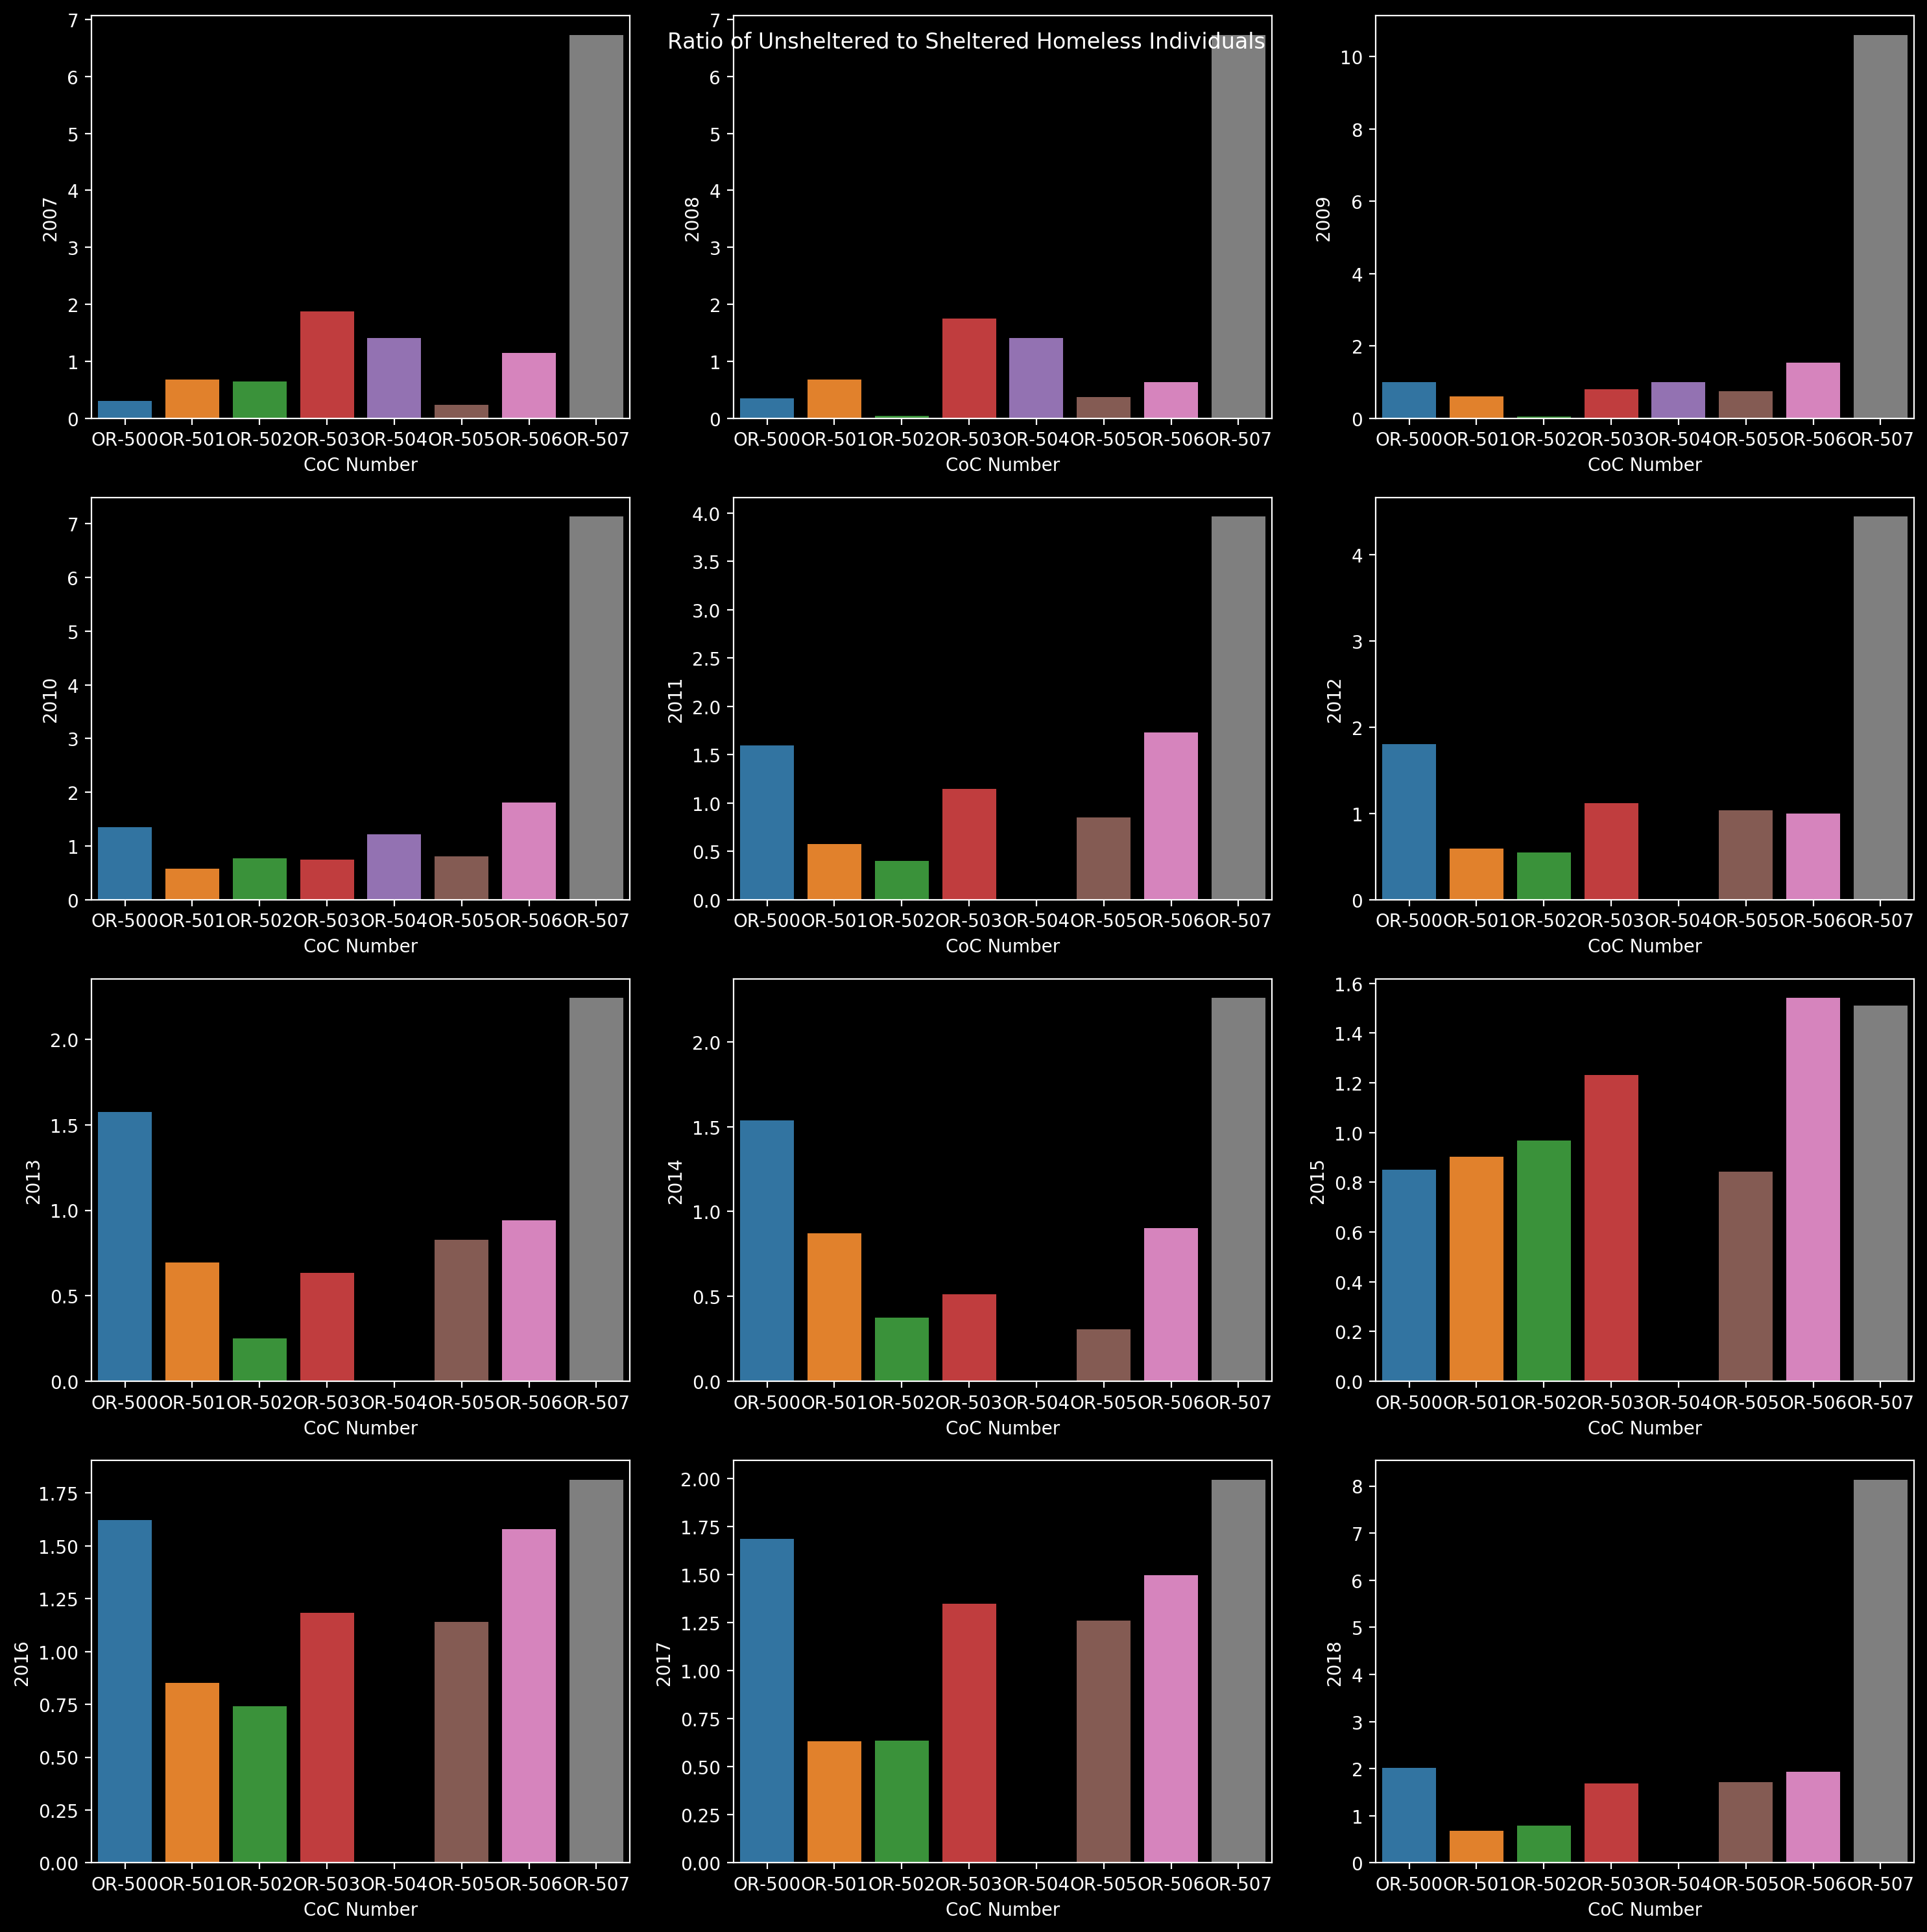

In [14]:
fig, axis = plt.subplots(4, 3, figsize=(15,15))
year = 0
for m in range(4):
    for j in range(3):
        sns.barplot(data=oregoncut, y=oregoncut['Unsheltered Homeless Individuals, ' + str(years[year])]
                    / oregoncut['Sheltered Total Homeless, ' + str(years[year])], x = "CoC Number", 
                    ax=axis[m, j])
        axis[m, j].set_ylabel(years[year])
        year += 1
fig.suptitle("Ratio of Unsheltered to Sheltered Homeless Individuals")
plt.tight_layout()

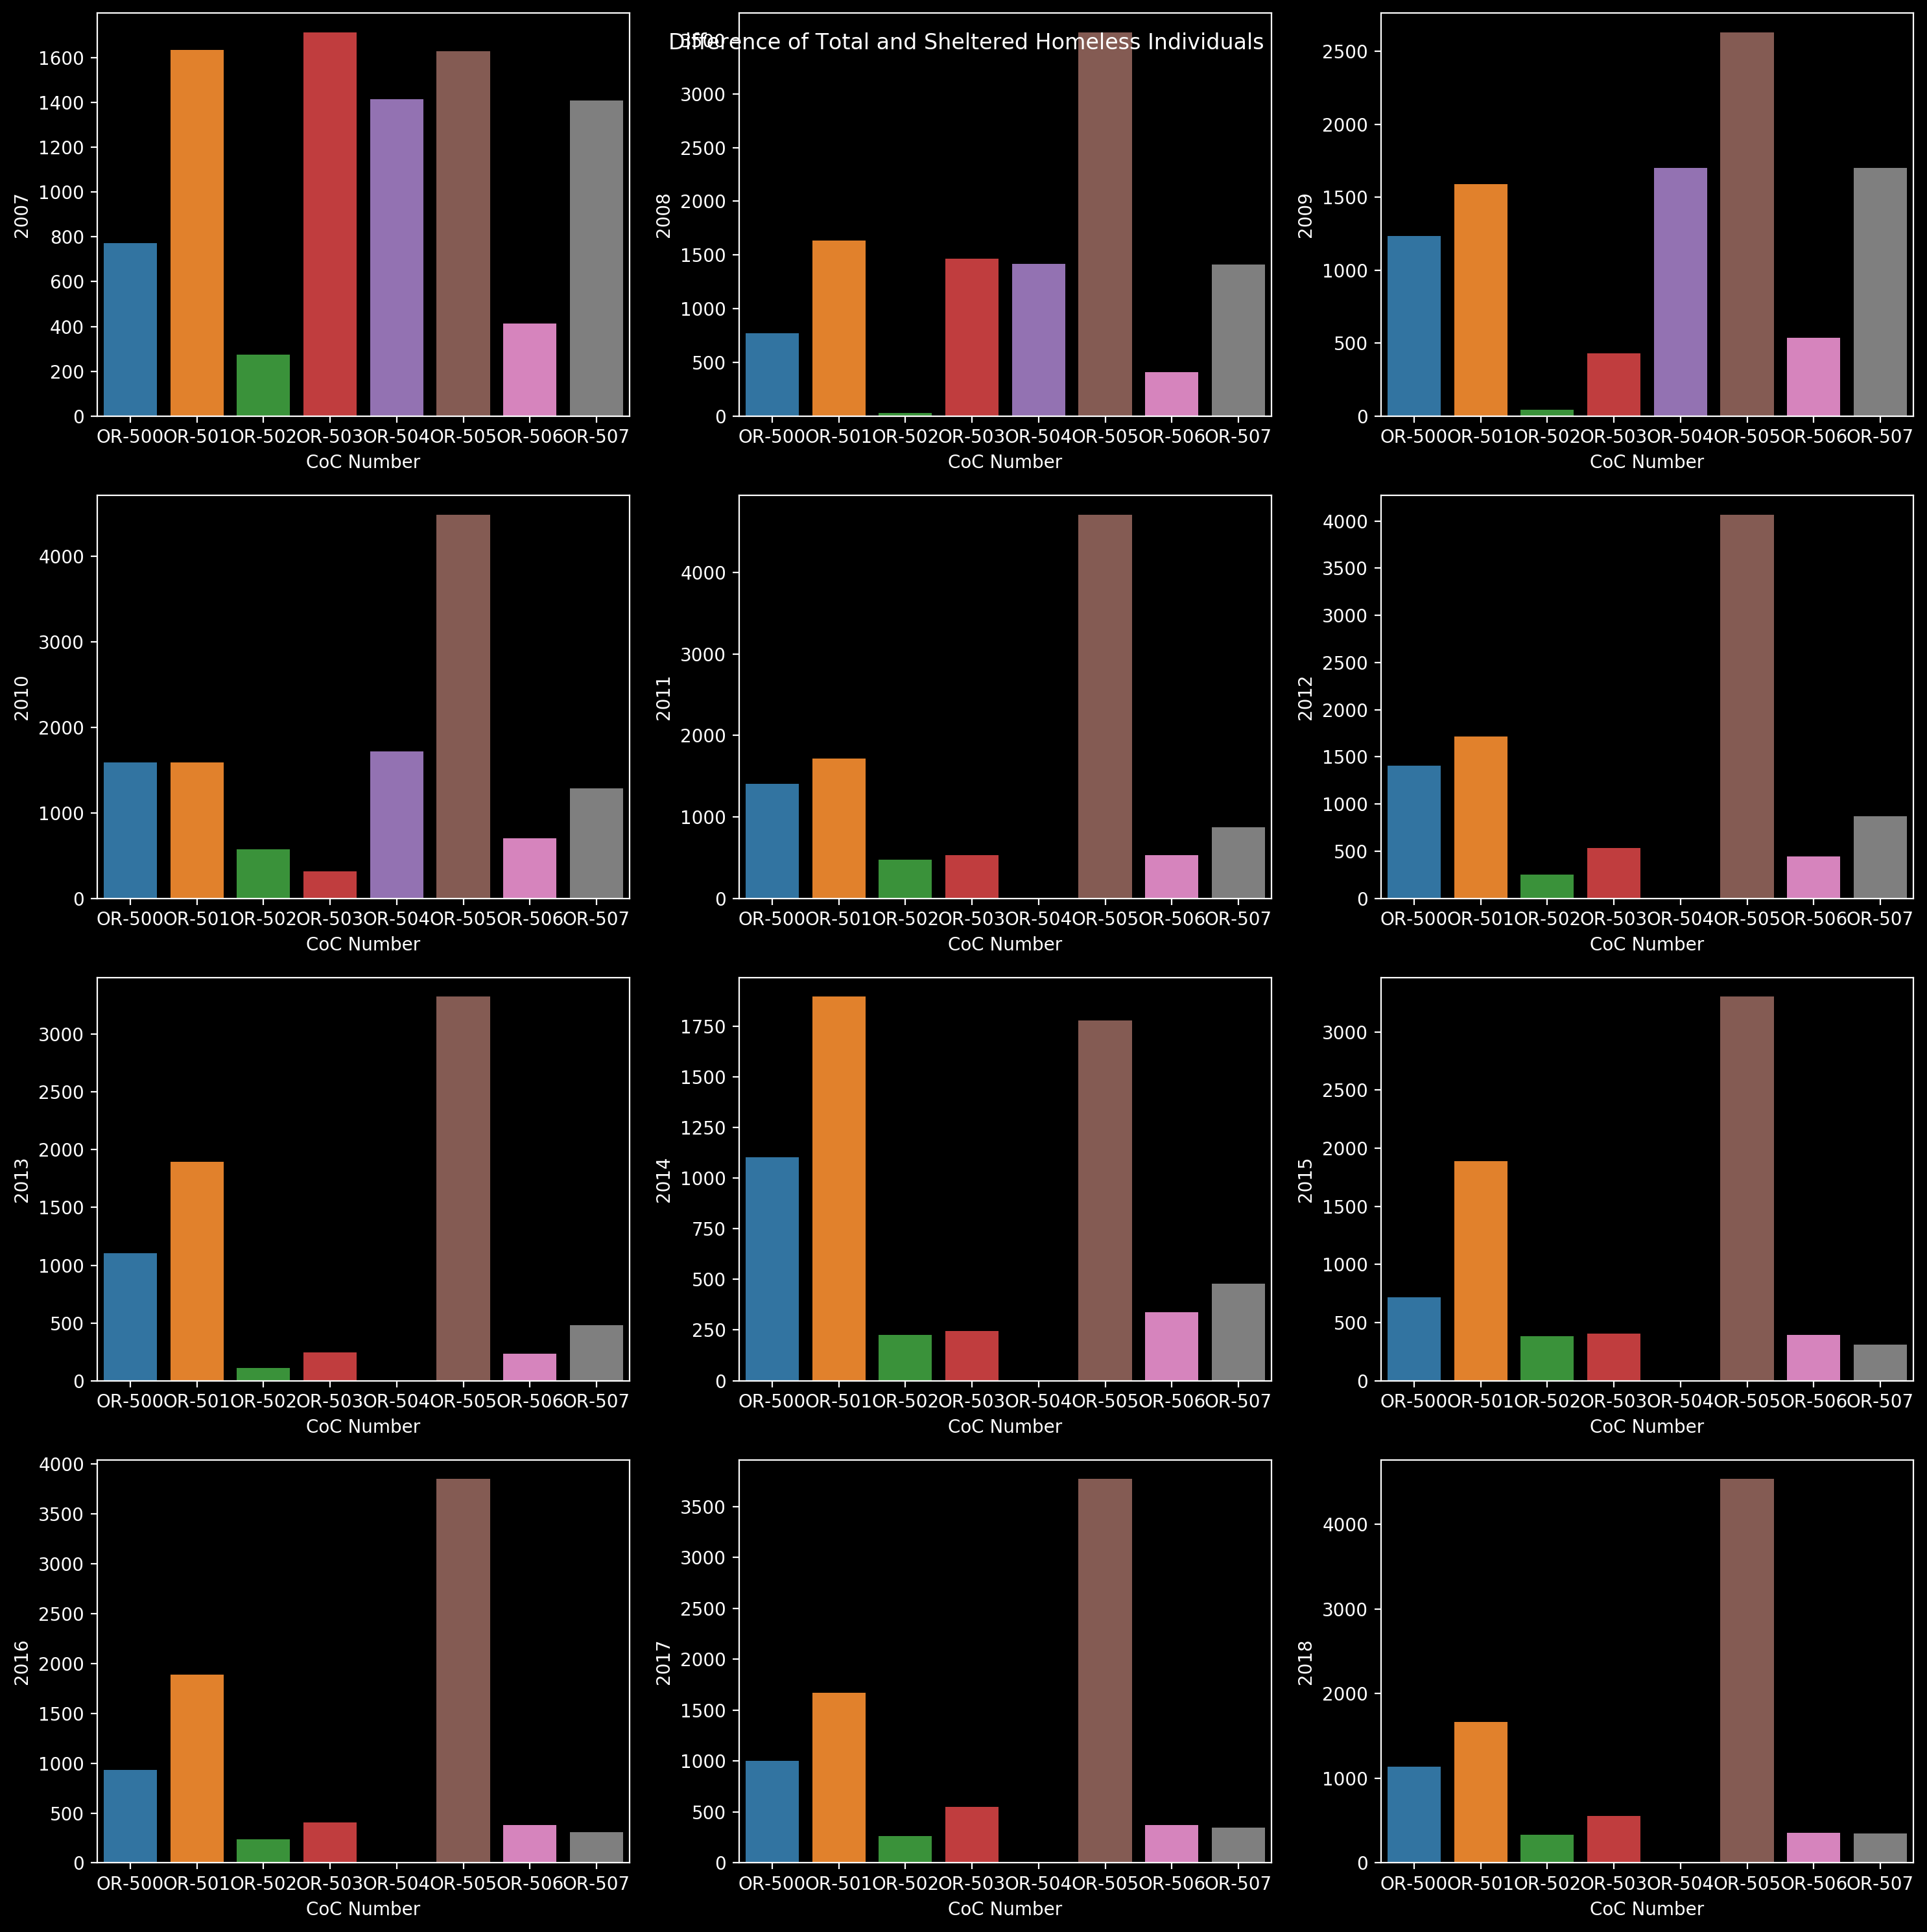

In [15]:
fig, axis = plt.subplots(4, 3, figsize=(15,15))
year = 0
for m in range(4):
    for j in range(3):
        sns.barplot(data=oregoncut, y=oregoncut['Overall Homeless, ' + str(years[year])]
                    - oregoncut['Sheltered Total Homeless, ' + str(years[year])], x = "CoC Number", 
                    ax=axis[m, j])
        axis[m, j].set_ylabel(years[year])
        year += 1
fig.suptitle("Difference of Total and Sheltered Homeless Individuals")
plt.tight_layout()

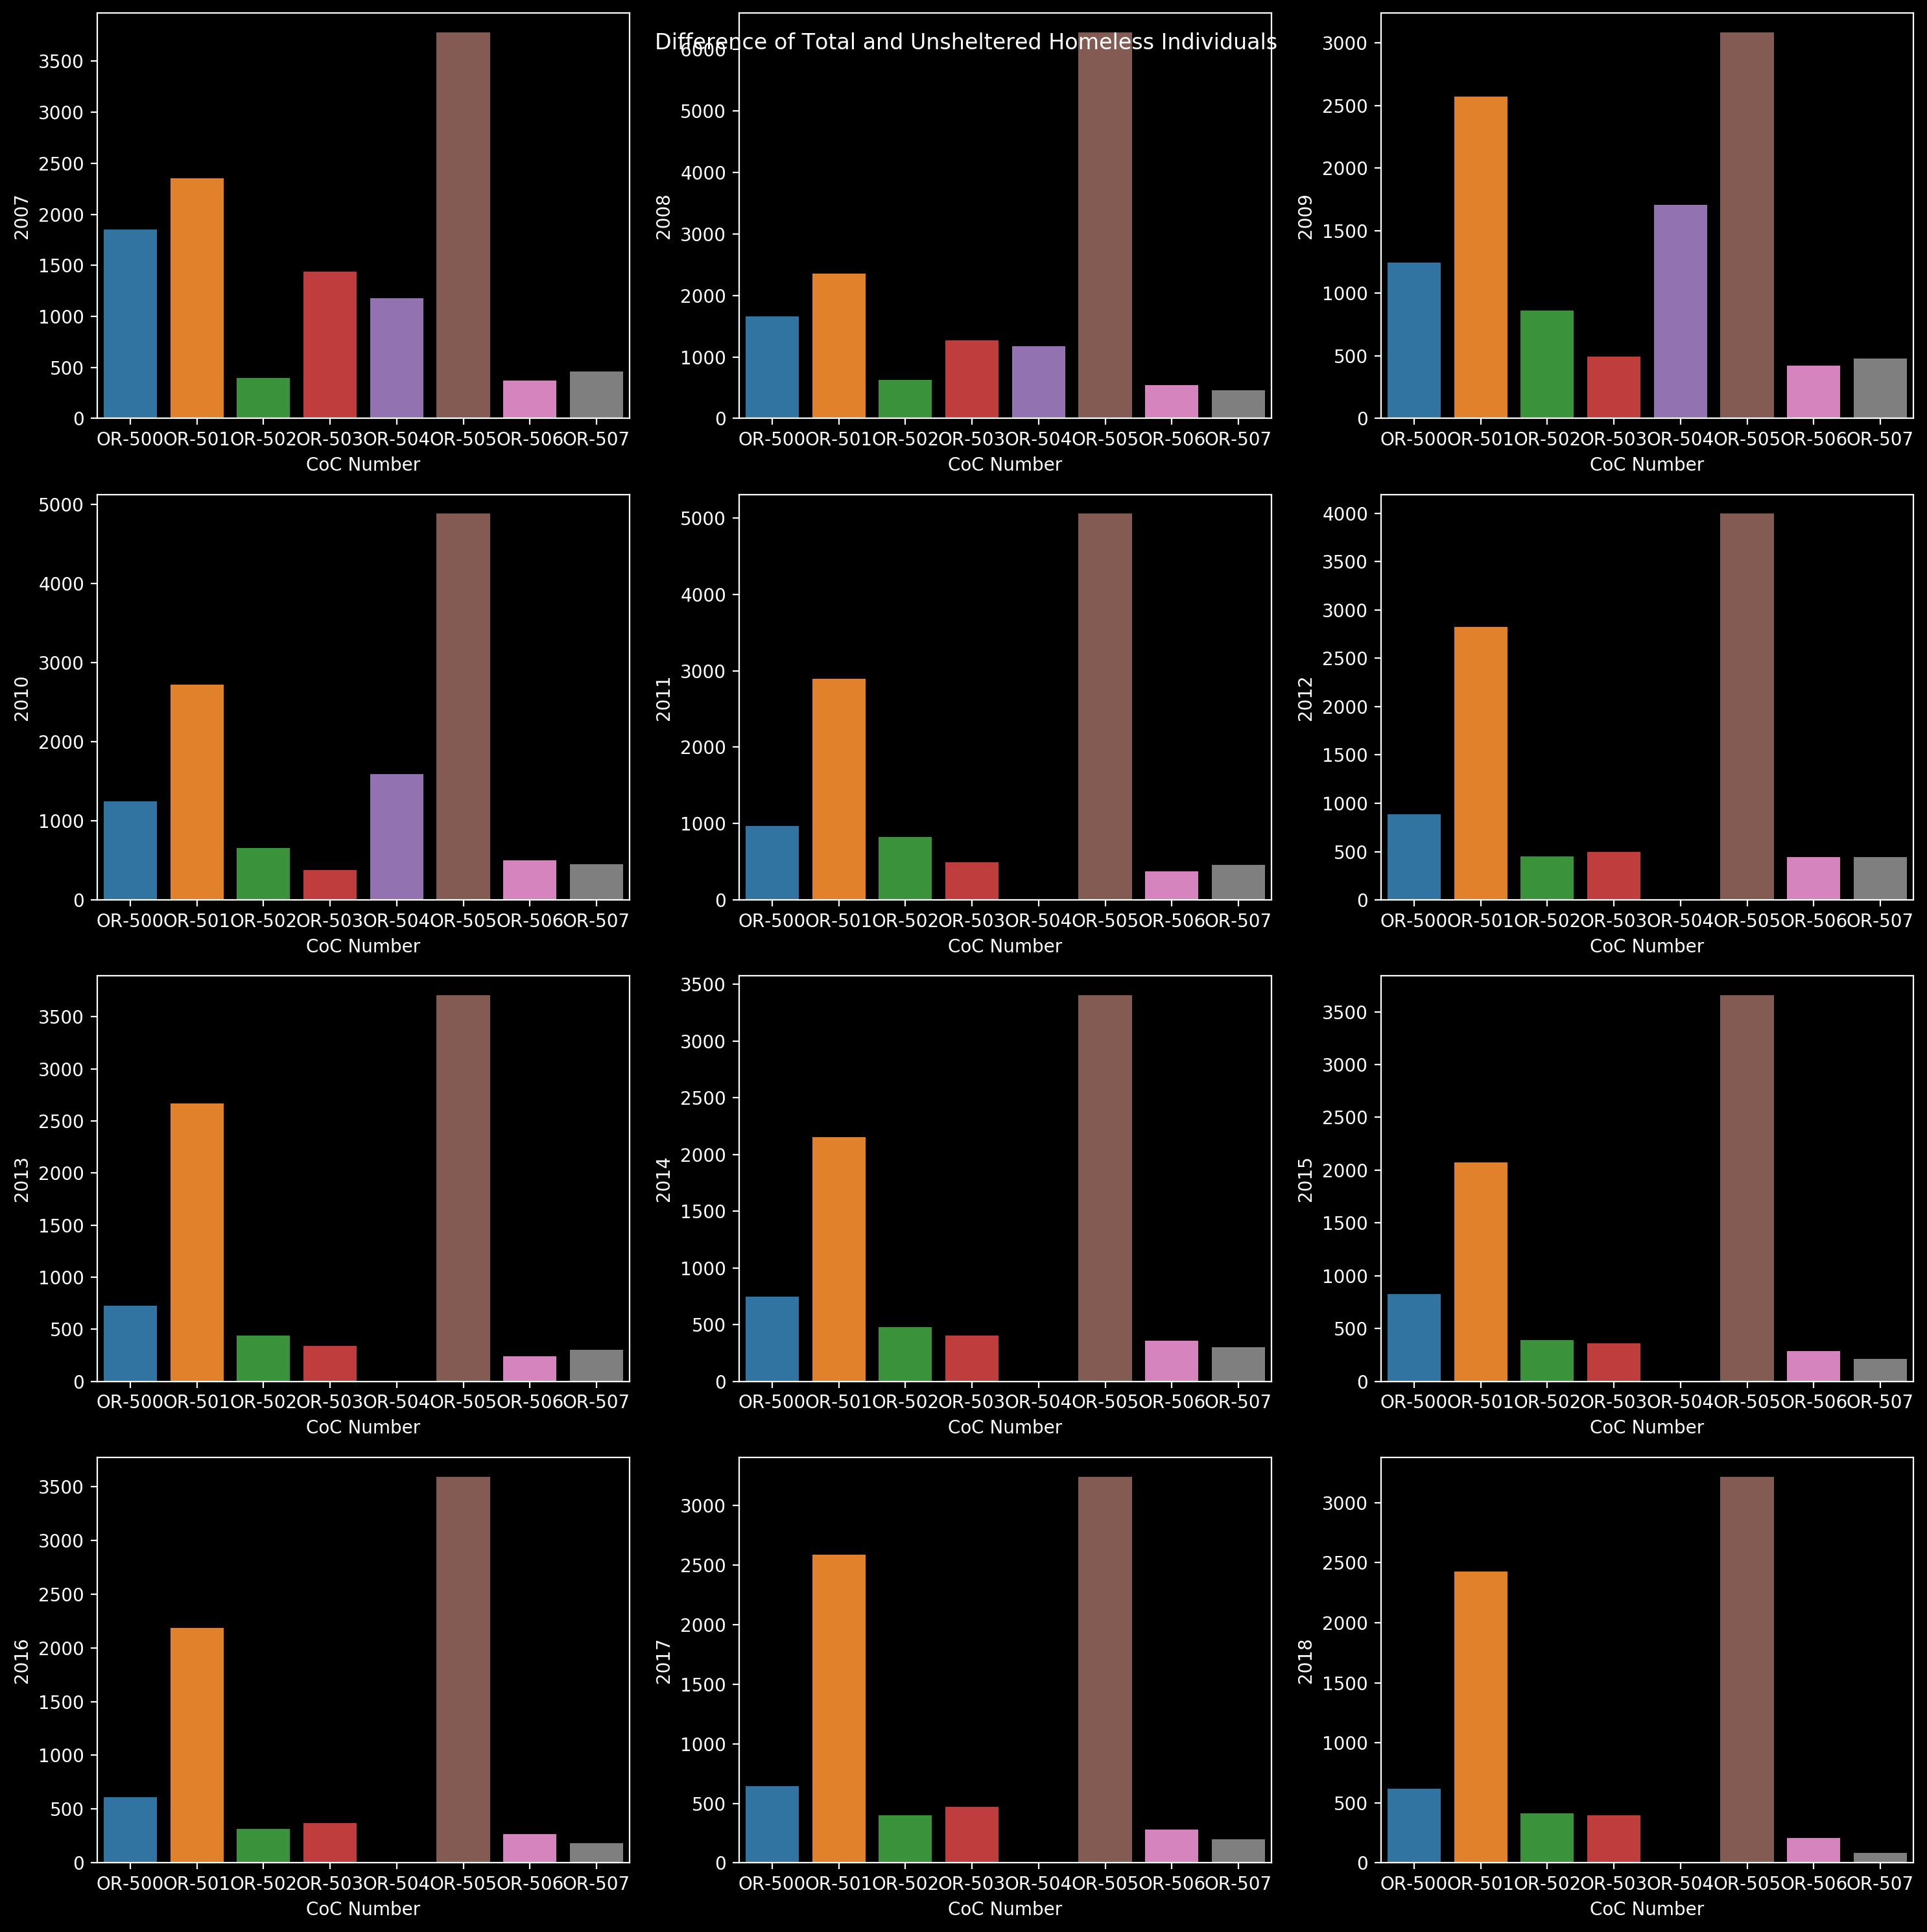

In [16]:
fig, axis = plt.subplots(4, 3, figsize=(15,15))
year = 0
for m in range(4):
    for j in range(3):
        sns.barplot(data=oregoncut, y=oregoncut['Overall Homeless, ' + str(years[year])]
                    - oregoncut['Unsheltered Homeless Individuals, ' + str(years[year])], x = "CoC Number", 
                    ax=axis[m, j])
        axis[m, j].set_ylabel(years[year])
        year += 1
fig.suptitle("Difference of Total and Unsheltered Homeless Individuals")
plt.tight_layout()

In [17]:
# I will figure out what the issue here is soon. 

#sns.scatterplot(x = "Overall Homeless",y = "Overall Homeless People in Families",data = oregoncut, hue = "CoC Number")

In [18]:
# New issue here as well. It was working before...

#sns.lmplot(x = "Overall Homeless Individuals",y = "Overall Homeless People in Families",data = oregoncut, line_kws = {"color":"red"})

In [19]:
# Graph of Overall homelessness in Oregon 

#Filters data for variable we want 
OVH = OR[OR["Description"]=="Overall Homeless"]

# creates timeseries of homeless count in each municipality 
fig = px.line(OVH, x="Year", y="Homeless Count", color = "CoC Name")
fig.update_layout(title="Total Homeless in Oregon")
fig.show()

In [76]:
# Filtering for Overall homelessness in Oregon by Gender 
FMG = OR[(OR["Description"]=="Overall Homeless - Female") | (OR["Description"]=="Overall Homeless - Male")
        |(OR["Description"]=="Overall Homeless - Gender Non-Conforming")]
# Getting the total sum of homless per year
FMG= FMG.groupby(by=["Description", "Year"], group_keys=True, as_index=False)["Homeless Count"].sum()

In [88]:
FMG

Description  Year  Homeless Count
0   Overall Homeless - Female  2015          5197.0
1   Overall Homeless - Female  2016          5286.0
2   Overall Homeless - Female  2017          5493.0
3   Overall Homeless - Female  2018          5659.0
4   Overall Homeless - Female  2019          6187.0
5   Overall Homeless - Female  2020          5443.0
10    Overall Homeless - Male  2015          7977.0
11    Overall Homeless - Male  2016          7893.0
12    Overall Homeless - Male  2017          8368.0
13    Overall Homeless - Male  2018          8690.0
14    Overall Homeless - Male  2019          9551.0
15    Overall Homeless - Male  2020          9072.0

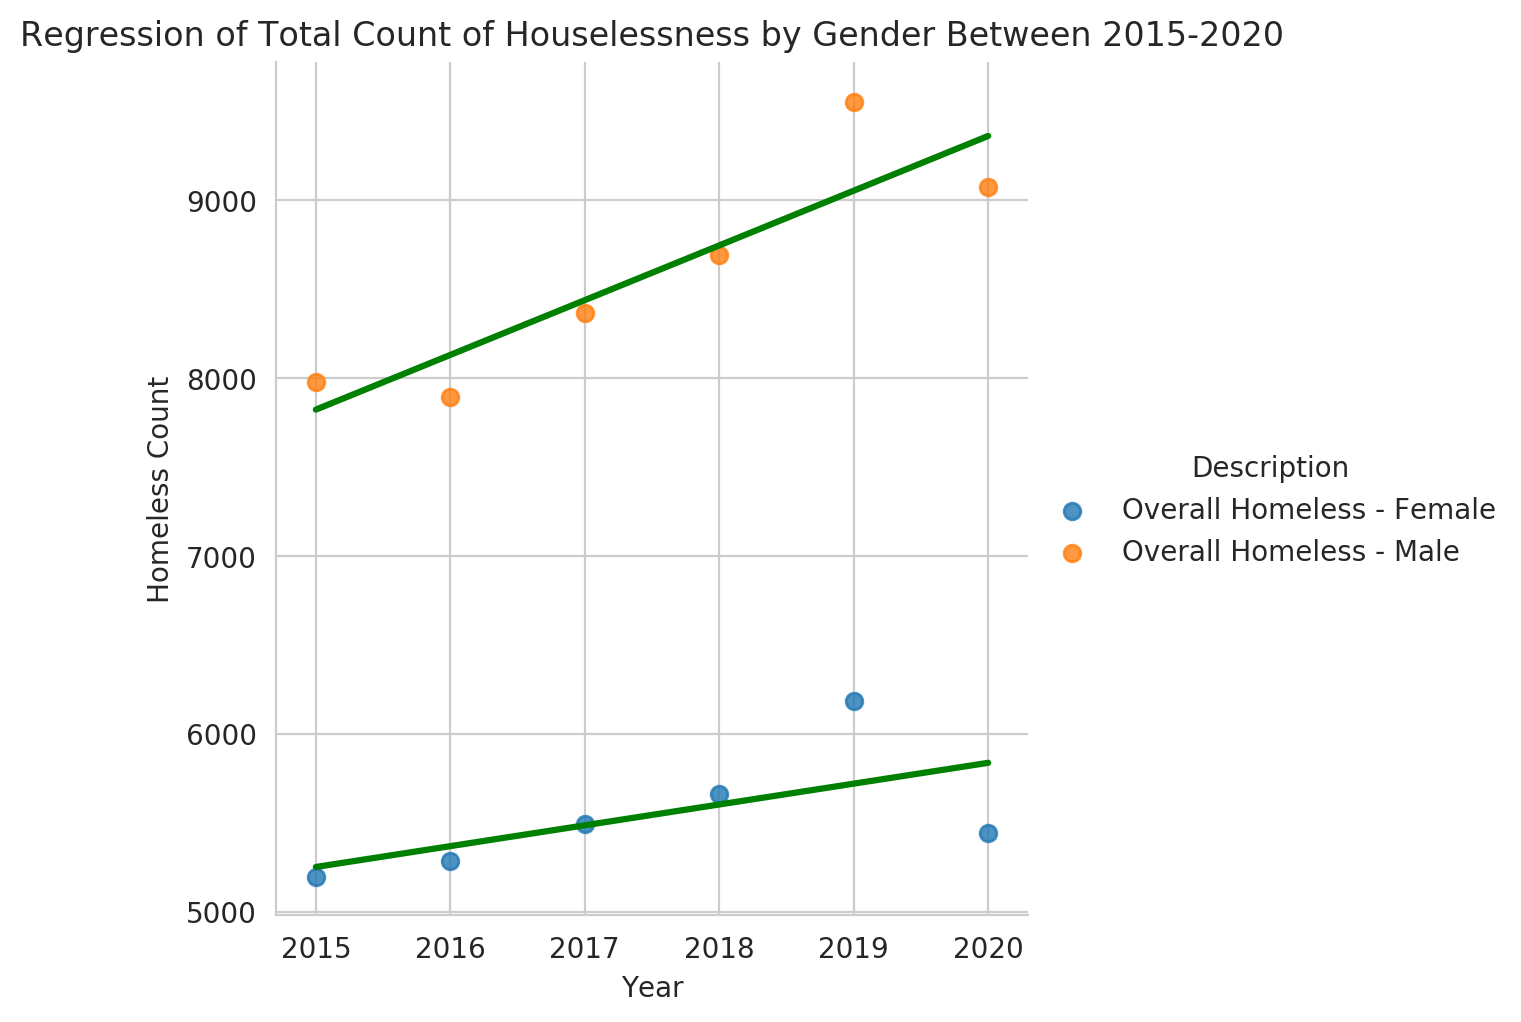

In [97]:
sns.set_style("whitegrid")
sns.lmplot(x = "Year",y = 'Homeless Count',data = FMG, hue = "Description",line_kws = {"color":"green"},ci = None).set(title="Regression of Total Count of Houselessness by Gender Between 2015-2020")




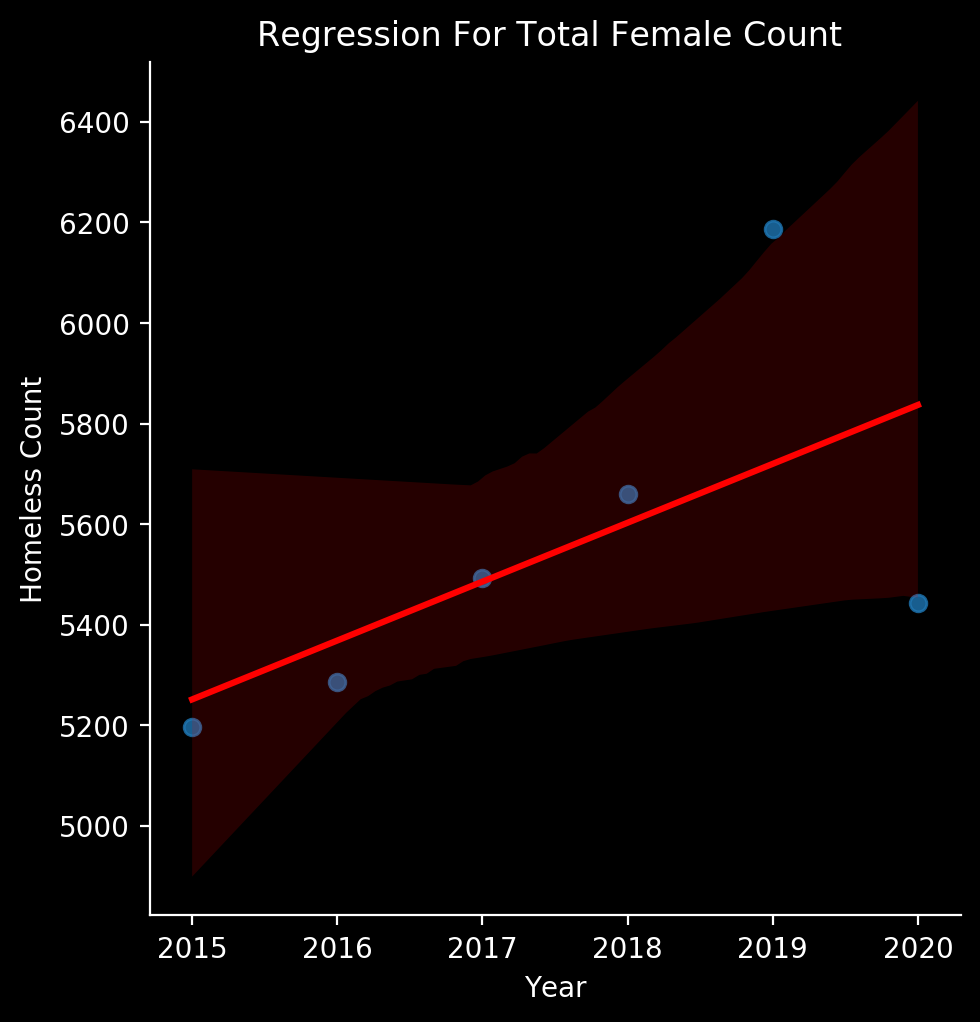

In [58]:
ax = sns.lmplot(x = "Year",y = 'Homeless Count',data = Female, line_kws = {"color":"red"})
ax.set(title = "Regression For Total Female Count ")


In [21]:
# Creates this amazing timeseries of our data 
fig = px.line(FMG, x="Year", y="Homeless Count", color = "Description")
fig.update_layout(title="Total Homeless in Oregon by Gender")
fig.show()

In [22]:
# Checking to see if a bar plot with same gender variables 
fig = px.bar(FMG, x="Year", y="Homeless Count", color="Description", barmode="group")
fig.update_layout(title="Total Homeless in Oregon by Gender")
fig.show()

## Reading in Population Data 

In [23]:
# reading in the data and filtering for Oregon
pop = pd.read_csv('Data USA Cart.csv')
popOR= pop[pop["State"]=="OR"]

# Droping the columns that are useless
popOR= popOR.drop(["ID Geography", "Geography"], axis=1)
# Creating an index (columns that will not move)
popOR.set_index(["CoC Number", "County", "State"], inplace=True)
# Reset the rows so that there are 2 columns (year and population)
popOR = popOR.stack().reset_index()

# Renaming rows for easier understading
popOR.columns= ["CoC Number", "County", "State", "Year", "Population"]
# Removing extra characters in the Year column 
popOR["Year"] = popOR["Year"].map(lambda x: str(x)[12:-1])

# Changing the datafame dtypes 
popOR["Year"] = popOR["Year"].astype("str").astype("int")
OR["Year"] = OR["Year"].astype("str").astype("int")

In [24]:
# creates a new dataframe with populiaton added 
# first merges on the CoC Number then by the Year
pOR= OR.merge(popOR, how="right", left_on=["CoC Number", "Year"], right_on=["CoC Number", "Year"])
pOR.head()

CoC Name CoC Number  ...  State Population
0  Eugene, Springfield/Lane County CoC     OR-500  ...     OR   356212.0
1  Eugene, Springfield/Lane County CoC     OR-500  ...     OR   356212.0
2  Eugene, Springfield/Lane County CoC     OR-500  ...     OR   356212.0
3  Eugene, Springfield/Lane County CoC     OR-500  ...     OR   356212.0
4  Eugene, Springfield/Lane County CoC     OR-500  ...     OR   356212.0

[5 rows x 8 columns]

## Population vs Homeless Data Exploration 

In [25]:
#Want to see the relationship between population and amount of people homeless 

#filtering for Overall homelessness
tOVH = pOR[pOR["Description"]=="Overall Homeless"]
tOVH = tOVH.groupby(by=["Year", "CoC Name"],group_keys=True, as_index=False)[["Population","Homeless Count"]].sum()
tOVH.head()

Year                                    CoC Name  Population  Homeless Count
0  2013                          Central Oregon CoC    165954.0           506.0
1  2013                        Clackamas County CoC    388263.0           619.0
2  2013         Eugene, Springfield/Lane County CoC    356212.0          1751.0
3  2013  Hillsboro, Beaverton/Washington County CoC    554996.0           432.0
4  2013         Medford, Ashland/Jackson County CoC    208545.0           548.0

In [26]:
# scatterplot of homeless to populaiton 
#sns.relplot(data=tOVH, y="Count", x="Population", kind="scatter", hue="CoC Name")
fig = px.scatter(tOVH, x="Population", y="Homeless Count", color="Year")
fig.update_layout(title="Population vs Total Homeless in Oregon")
fig.show()

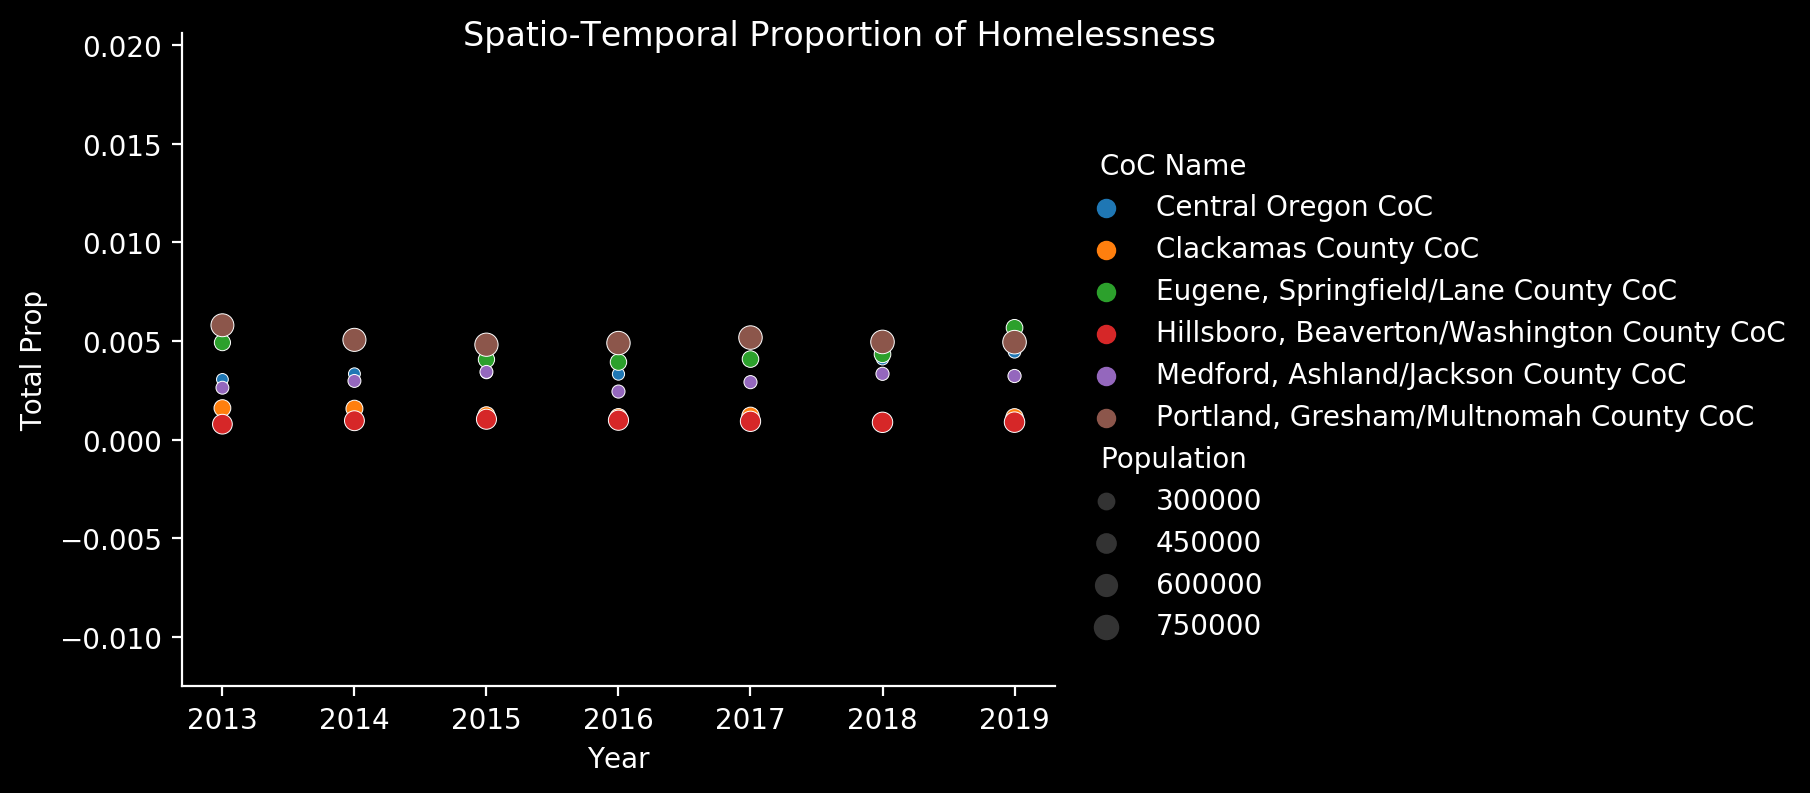

In [27]:
# Visualizing population vs count another way
tOVH["Homeless Count"] = tOVH["Homeless Count"].astype("float")
tOVH["Population"] = tOVH["Population"].astype("float")
tOVH["Total Prop"] = tOVH["Homeless Count"] / tOVH["Population"]
tOVH_no_BOS = tOVH[tOVH["CoC Name"] != "Oregon Balance of State CoC"]
sns.relplot(data=tOVH_no_BOS, y="Total Prop", x="Year", hue="CoC Name", size = "Population",
            aspect = 1.5, height = 4).fig.suptitle("Spatio-Temporal Proportion of Homelessness")
plt.show()

## Reading in Income Data 

In [28]:
# Here I add population data so that we could use that info for regressions 

# reading in the data and filtering for Oregon
inc = pd.read_csv('Income by Location.csv')

# Droping the columns that are useless
inc= inc.drop(["Geography", "ID Geography", "ID Year", "ID Race", "Slug Geography","Household Income by Race Moe"], axis=1)
# Creating an index (columns that will not move)
inc.set_index(["County", "State", "Year", "Race"], inplace=True)
# Reset the rows so that there are 2 columns (year and population)
incOR = inc.stack().reset_index()

# Renaming rows for easier understading
incOR.columns= ["County", "State", "Year","Race","X", "Median Income"]
# Removing extra characters in the Year column 
inctOR = incOR.drop(["X"], axis=1)
#inctOR = incOR[incOR["Race"]=="Total"]
inctOR["Year"] = inctOR["Year"].astype("str").astype("int")
inctOR

FileNotFoundError: [Errno 2] File Income by Location.csv does not exist: 'Income by Location.csv'

## Homless vs Income & Population Data Exploration 

In [ ]:
# creates a new dataframe with populiaton added 
# first merges on the County then by the Year
piOR= pOR.merge(inctOR, how="left", left_on=["County", "Year"], right_on=["County", "Year"])
piOR=piOR.drop(["State_x", "State_y"], axis=1)
piOR.head()

In [ ]:
# dataset where race is only set to total and Overall homelessness as description
trOR = piOR[piOR["Race"]=="Total"]
trOR = trOR[trOR["Description"]=="Overall Homeless"]

In [ ]:
# Creating a graph that shows the medium income and homelessness over the years. 
fig = px.scatter(trOR, x="Year", y="Homeless Count", color="Median Income")
fig.update_layout(title="Medium Income vs Total Homeless in Oregon")
fig.show()

In [ ]:
# filtering data to use for graph 
t = trOR.groupby(by=["Year", "CoC Name"],group_keys=True, as_index=False)[["Population","Homeless Count","Median Income"]].sum()

# Visualizing population vs count another way
t["Homeless Count"] = t["Homeless Count"].astype("float")
t["Population"] = t["Population"].astype("float")
t["Total Prop"] = t["Homeless Count"] / t["Population"]
t_no_BOS = t[t["CoC Name"] != "Oregon Balance of State CoC"]
sns.relplot(data=t_no_BOS, y="Total Prop", x="Year", hue="CoC Name", size = "Median Income",
            aspect = 1.5, height = 4).fig.suptitle("Spatio-Temporal Proportion of Homelessness")
plt.savefig('incvspopvshomeless.png')
plt.show()

In [ ]:
lowictOR = trOR[trOR["Median Income"]<=100000]
fig, ax =plt.subplots(2,1)
sns.scatterplot(data=lowictOR, x="Year", y="Homeless Count", hue="Median Income", ax=axis[0])
sns.scatterplot(data=lowictOR, x="Year", y="Homeless Count", hue="CoC Number", ax=axis[1])
fig.show()

# I could not figure this one out. Help lol 

## Regression

Commets still need to be made throughout this section 

In [ ]:
piOR.corr(method = 'kendall')

I would change the dataset to not use oregoncut but to use piOR. This will include population and mean income data. I would recommend that you first filter for "Overall Homeless" first 
ie 
x = prOR["Description"] = "Overall Homeless" 

then use x as the dataframe. 

In [ ]:
y = oregoncut[(oregoncut["CoC Number"]!="OR-505")&(oregoncut["CoC Number"]!="OR-501")]['Overall Homeless Individuals'].dropna().values.reshape(-1,1)
x =oregoncut['year'][(oregoncut["CoC Number"]!="OR-505")&(oregoncut["CoC Number"]!="OR-501")][:-6].dropna().values.reshape(-1,1)

x_train, x_test, y_train,y_test = train_test_split(x,y,test_size = .2, random_state = 0 )

In [ ]:
regressor = LinearRegression()
regressor.fit(x_train,y_train)
print(regressor.intercept_)
print(regressor.coef_)

In [ ]:
y_pred = regressor.predict(x_test)
df = pd.DataFrame({'Actual':y_test.flatten(), 'Predicted':y_pred.flatten()})
df

In [ ]:
df1 = df.head(25)
df1.plot(kind = 'bar', figsize = (10,8))

plt.grid(which = 'major', linestyle = '-', linewidth = .5,color = 'green')

In [ ]:
plt.scatter(x_test,y_test,color = "blue")
plt.plot(x_test, y_pred,color = 'red', linewidth = 2)

In [ ]:
print('Means Absolute Error', metrics.mean_absolute_error(y_test,y_pred))
print('Mean Squared Error', metrics.mean_squared_error(y_test,y_pred))
print('Root Mean Squared Error', np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

In [ ]:
y = oregoncut["Overall Homeless"].dropna()
X = oregoncut["CoC Number"].dropna()

# Note the difference in argument order
model = sm.OLS(y, X).fit()
predictions = model.predict(X) # make the predictions by the model

# Print out the statistics
model.summary()